# Library import

In [1]:
# Importeren benodigde libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from os import path, getcwd
import datetime

## Data import

In [2]:
# Dataset path
root_dir = path.join(getcwd(), 'Datasets')
alle_cijfers = path.join(root_dir, "2_AlleCijfers-Corona-besmet-opgenomen-overleden.xlsx")

# Import all data
test_leeftijden_df = pd.read_excel(alle_cijfers, sheet_name="PositieveTestLeeftijden")
verdeling_leeftijden_df = pd.read_excel(alle_cijfers, sheet_name="VerdelingLeeftijden")
verdeling_geslacht_df = pd.read_excel(alle_cijfers, sheet_name="VerdelingGeslacht")
nice_df = pd.read_excel(alle_cijfers, sheet_name="NICE")
lcps_df = pd.read_excel(alle_cijfers, sheet_name="LCPS")
opgenomen_df = pd.read_excel(alle_cijfers, sheet_name="Opgenomen")
casus_landelijk_df = df = pd.read_csv(path.join(root_dir, "COVID-19_casus_landelijk.csv"), sep=";")
opnames_leeftijdgroep_df = pd.read_csv(path.join(root_dir, "COVID-19_ziekenhuis_ic_opnames_per_leeftijdsgroep.csv"), sep=";")
ziekenhuisopnames_df = pd.read_csv(path.join(root_dir, "COVID-19_ziekenhuisopnames.csv"), sep=";")

c:\Users\snemm\Desktop\School\BD04\PI7\Machine-learning-PI7\env\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


# Data preprocessing

Datumselectie maken waarbinnen de resultaten dienen te vallen

In [3]:
# Convert date columns to datetime
verdeling_geslacht_df["Date_adj"] = pd.to_datetime(verdeling_geslacht_df["Datum"]) 
verdeling_leeftijden_df["Date_adj"] = pd.to_datetime(verdeling_leeftijden_df["Datum"]) 
lcps_df['Date_adj'] = pd.to_datetime(lcps_df['Datum'])  
nice_df['Date_adj'] = pd.to_datetime(nice_df['Datum'])  
casus_landelijk_df["Date_adj"] = pd.to_datetime(casus_landelijk_df["Date_statistics"])  
test_leeftijden_df["Date_adj"] = pd.to_datetime(test_leeftijden_df["Datum"])
opnames_leeftijdgroep_df["Date_adj"] = pd.to_datetime(opnames_leeftijdgroep_df["Date_of_statistics_week_start"])
ziekenhuisopnames_df["Date_adj"] = pd.to_datetime(ziekenhuisopnames_df["Date_of_statistics"])

# List all datasets
datasets = [
    test_leeftijden_df, verdeling_leeftijden_df, verdeling_geslacht_df,
    nice_df, lcps_df, casus_landelijk_df, opnames_leeftijdgroep_df,
    ziekenhuisopnames_df
]

# Find latest min date
min_date = max([df['Date_adj'].min() for df in datasets])
max_date = datetime.datetime(2021, 11, 1)

print([df['Date_adj'].min() for df in datasets])

# Apply date mask to all datasets and unpack
test_leeftijden_adj, verdeling_leeftijden_adj, verdeling_geslacht_adj, nice_adj, lcps_adj, casus_landelijk_adj, opnames_leeftijdgroep_adj, ziekenhuisopnames_adj = [df.loc[(df['Date_adj'] >= min_date) & (df['Date_adj'] <= max_date)] for df in datasets]


[Timestamp('2021-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-03-17 00:00:00'), Timestamp('2020-02-27 00:00:00'), Timestamp('2020-01-01 00:00:00'), Timestamp('2020-02-24 00:00:00'), Timestamp('2020-02-27 00:00:00')]


## Totaal aantal besmetting per dataset

In [4]:
# Get total infection values
casus_landelijk_besmettingen = len(casus_landelijk_adj.index)
verdeling_leeftijden_besmettingen = verdeling_leeftijden_adj.loc[verdeling_leeftijden_adj['Corona statistiek'] == 'besmettingen']['Totaal'].sum()
test_leeftijden_besmettingen = test_leeftijden_adj["Aantal RIVM positief"].sum()
verdeling_geslacht_besmettingen = verdeling_geslacht_adj.loc[verdeling_geslacht_adj['Corona statistiek'] == 'besmettingen']['Totaal'].sum()

totals = [verdeling_leeftijden_besmettingen, test_leeftijden_besmettingen, verdeling_geslacht_besmettingen, casus_landelijk_besmettingen]
stdev_infections = np.round(np.std(totals))
mean_infections = np.round(np.mean(totals))
print(f'Standaard deviatie: {stdev_infections}')
print(f'Gemiddelde: {mean_infections}')
print(totals)


Standaard deviatie: 1798.0
Gemiddelde: 1345878.0
[1346919, 1342765, 1346984, 1346844]


## Plotten aantal besmettingen

Text(0, 0.5, 'Aantal besmettingen')

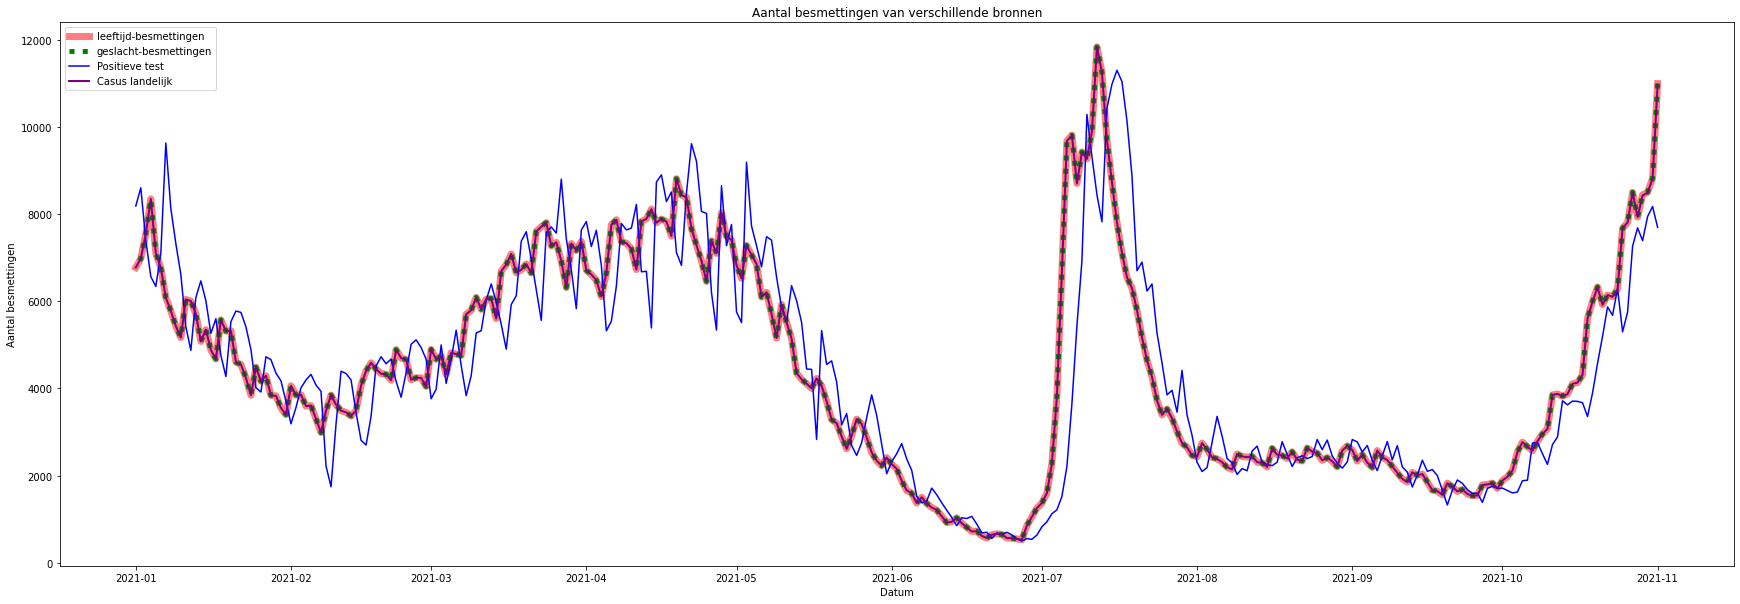

In [5]:
# Filter set to infections only
verdeling_leeftijden_adj_besmetting = verdeling_leeftijden_adj[verdeling_leeftijden_adj['Corona statistiek'] == 'besmettingen']
verdeling_geslacht_adj_besmetting = verdeling_geslacht_adj.loc[verdeling_geslacht_adj['Corona statistiek'] == 'besmettingen']

# prep casus landelijk
casus_landelijk_total_by_date = casus_landelijk_adj.groupby(["Date_adj"])[["Date_adj"]].count().rename(columns={"Date_adj": "infections"})

# Plot infections by date
plt.figure(figsize=(30,10))
plt.plot(verdeling_leeftijden_adj_besmetting['Date_adj'], verdeling_leeftijden_adj_besmetting['Totaal'], c='red', linestyle='-', linewidth=7, alpha=0.5, label="leeftijd-besmettingen")
plt.plot(verdeling_geslacht_adj_besmetting['Date_adj'], verdeling_geslacht_adj_besmetting['Totaal'], c='green', linestyle=':', linewidth=5, label="geslacht-besmettingen")
plt.plot(test_leeftijden_adj['Date_adj'], test_leeftijden_adj["Aantal RIVM positief"], c='blue', label="Positieve test")
plt.plot(casus_landelijk_total_by_date.index, casus_landelijk_total_by_date['infections'], c='purple', linewidth=2, label="Casus landelijk")
plt.legend()
plt.title("Aantal besmettingen van verschillende bronnen")
plt.xlabel("Datum")
plt.ylabel("Aantal besmettingen")


De conclusie kan genomen worden dat de casus landelijk dataset gelijk is aan de geslacht/leeftijd datasets.

# Aantal ziekenhuisopnames

Text(0, 0.5, 'Aantal opnames')

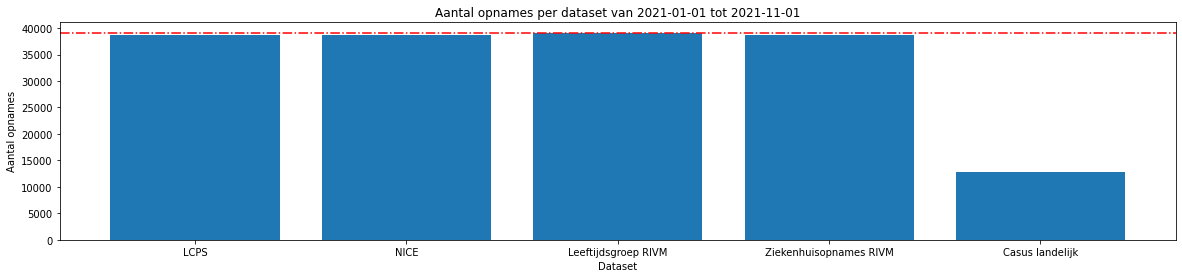

In [6]:
# Calculate total hospitalization
opgenomen_lcps_totaal = lcps_adj["Kliniek-nieuwe-opnames Corona"].sum()

opgenomen_nice_totaal = nice_adj["Opname verpleegafdeling totaal"].sum()

opgenomen_leeftijdgroep_rivm_totaal = opnames_leeftijdgroep_adj["Hospital_admission"].sum()

opnames_ziekenhuisopnames_totaal = ziekenhuisopnames_adj["Hospital_admission"].sum()

opnames_casus_landelijk_totaal = len(casus_landelijk_adj[casus_landelijk_adj['Hospital_admission'] == 'Yes'].index)

# Plotten van de resultaten
opname_list = [opgenomen_lcps_totaal, opgenomen_nice_totaal, opgenomen_leeftijdgroep_rivm_totaal, opnames_ziekenhuisopnames_totaal, opnames_casus_landelijk_totaal]

plt.figure(figsize=(20,4))
plt.bar(["LCPS", "NICE", "Leeftijdsgroep RIVM", "Ziekenhuisopnames RIVM", "Casus landelijk"], opname_list)
plt.axhline(max(opname_list), color="red", linestyle="-.")
plt.title(f"Aantal opnames per dataset van {min_date.date()} tot {max_date.date()}")
plt.xlabel("Dataset")
plt.ylabel("Aantal opnames")

Text(0, 0.5, 'Aantal ziekenhuisopnames per dag')

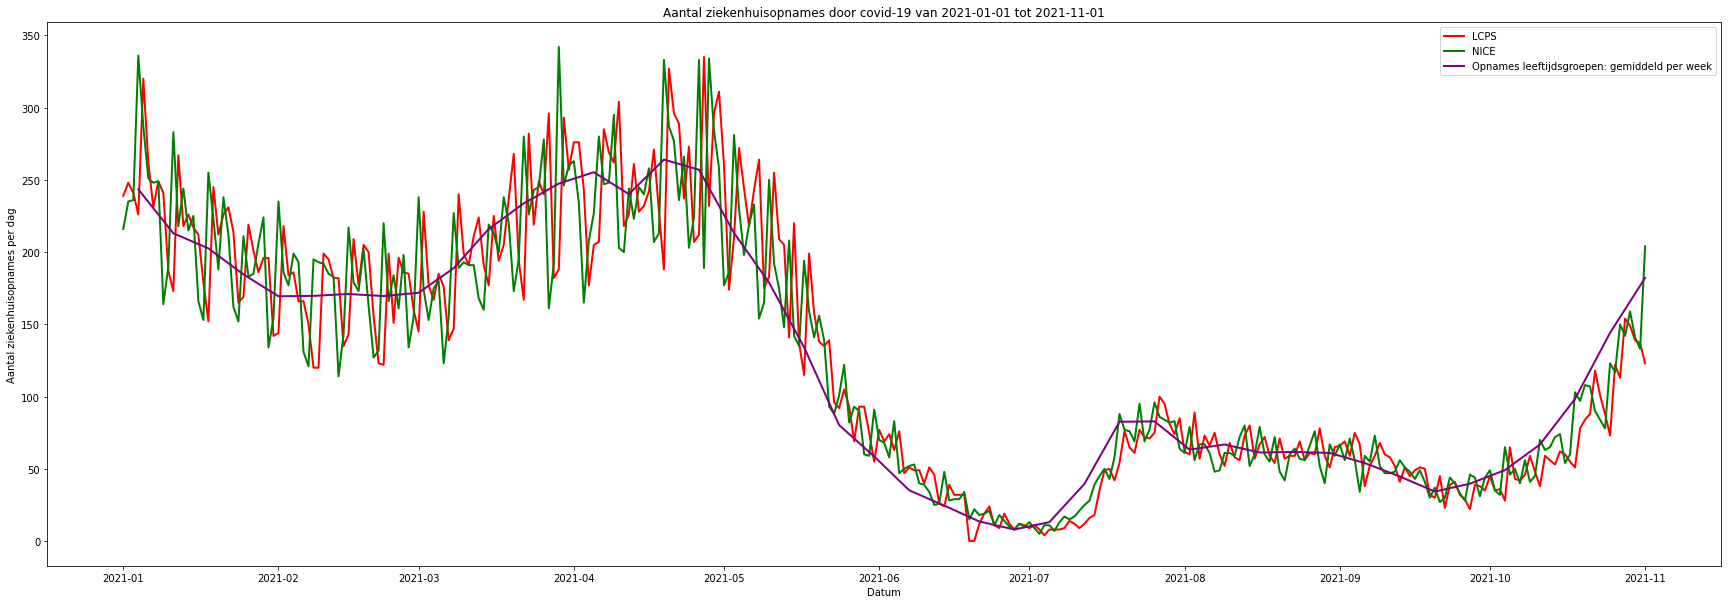

In [7]:
# Merge age groups to get totals per week
opnames_leeftijdgroep_totalen = opnames_leeftijdgroep_adj.groupby(['Date_adj']).sum()
# the rest of the data is new hospitalization per day, to make the graph work we divide weekly numbers by seven to show the mean increase for each week.
opnames_leeftijdgroep_totalen["Hospital_admission"] = opnames_leeftijdgroep_totalen["Hospital_admission"].div(7)

# Plot hospitalization

plt.figure(figsize=(30,10))
plt.plot(lcps_adj['Date_adj'], lcps_adj["Kliniek-nieuwe-opnames Corona"], c='red', linewidth=2, label="LCPS")
plt.plot(nice_adj['Date_adj'], nice_adj["Opname verpleegafdeling totaal"], c='green', linewidth=2, label="NICE")
plt.plot(opnames_leeftijdgroep_totalen.index, opnames_leeftijdgroep_totalen["Hospital_admission"], c='purple', linewidth=2, label="Opnames leeftijdsgroepen: gemiddeld per week")
plt.legend()
plt.title(f"Aantal ziekenhuisopnames door covid-19 van {min_date.date()} tot {max_date.date()}")
plt.xlabel("Datum")
plt.ylabel("Aantal ziekenhuisopnames per dag")

# Aantal IC-opnames

Text(0, 0.5, 'Aantal IC-opnames tot 1 november 2021')

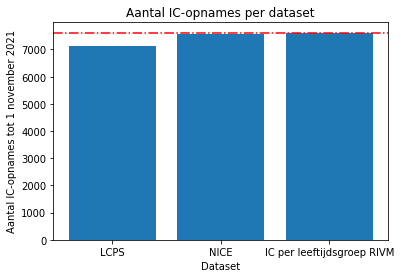

In [8]:
# Get IC totals
ic_lcps_totaal = lcps_adj["IC-nieuwe-opnames Corona"].sum()

ic_nice_totaal = nice_adj["Opname IC Corona"].sum()

ic_leeftijdgroep_totaal = opnames_leeftijdgroep_adj["IC_admission"].sum()

# Plot IC
ic_list = [ic_lcps_totaal, ic_nice_totaal, ic_leeftijdgroep_totaal]

plt.bar(["LCPS", "NICE", "IC per leeftijdsgroep RIVM"], ic_list)
plt.axhline(max(ic_list), color="red", linestyle="-.")
plt.title("Aantal IC-opnames per dataset")
plt.xlabel("Dataset")
plt.ylabel("Aantal IC-opnames tot 1 november 2021")

Text(0, 0.5, 'Aantal IC opnames per dag')

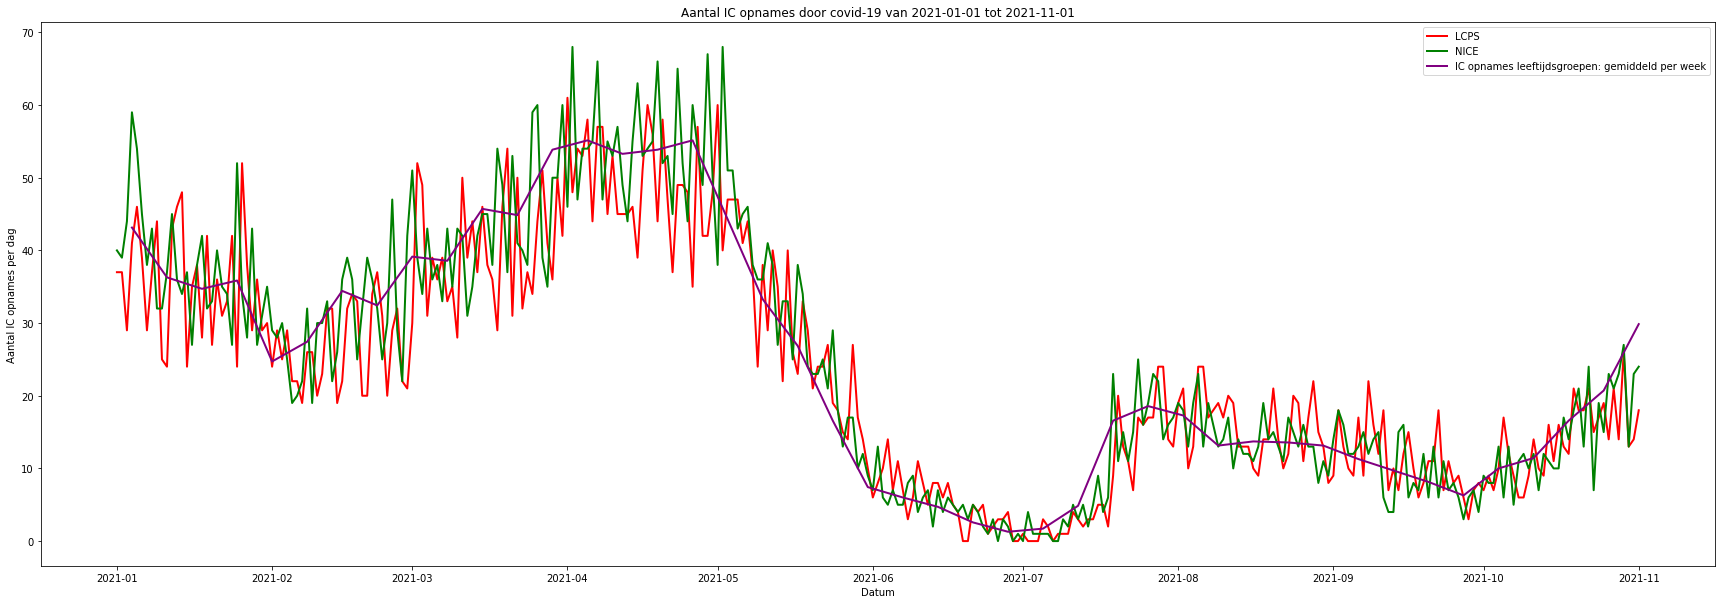

In [9]:
# Merge age groups to get totals per week
IC_leeftijdgroep_totalen = opnames_leeftijdgroep_adj.groupby(['Date_adj']).sum()
# the rest of the data is new hospitalization per day, to make the graph work we divide weekly numbers by seven to show the mean increase for each week.
IC_leeftijdgroep_totalen["IC_admission"] = IC_leeftijdgroep_totalen["IC_admission"].div(7)

# Plot hospitalization

plt.figure(figsize=(30,10))
plt.plot(lcps_adj['Date_adj'], lcps_adj["IC-nieuwe-opnames Corona"], c='red', linewidth=2, label="LCPS")
plt.plot(nice_adj['Date_adj'], nice_adj["Opname IC Corona"], c='green', linewidth=2, label="NICE")
plt.plot(IC_leeftijdgroep_totalen.index, IC_leeftijdgroep_totalen["IC_admission"], c='purple', linewidth=2, label="IC opnames leeftijdsgroepen: gemiddeld per week")
plt.legend()
plt.title(f"Aantal IC opnames door covid-19 van {min_date.date()} tot {max_date.date()}")
plt.xlabel("Datum")
plt.ylabel("Aantal IC opnames per dag")

Uit de data analyse volgt dat voor de besmettingen de casus_landelijk dataset dezelfde data is als de leeftijd en geslacht verdeling datasets.
Voor de besmettingscijfers wordt dus gekozen voor de casus_landelijk dataset gezien de andere enkel een onderdeel van dit geheel zijn. De cijfers uit de positieve test dataset volgen dezelfde trend echter zijn deze cijfers erg schommelend in vergelijken met de andere.

Voor de opname cijfers is deze casus_landelijk dataset echter niet zo goed gezien dit de enige dataset is die sterk afwijkt. De andere komen enigzins met elkaar overheen.
De leeftijdsgroep dataset van het RIVM is echter per week, en heeft dus een mindere granulariteit echter bevat deze wel de leeftijdsgroepen, LCPS en NICE hebben deze niet.

Uit de IC opname vergelijking blijkt dat het LCPS afwijkende cijfers heeft in vergelijking met NICE en de leeftijdsverdeling datasets. De NICE dataset is dus waarschijnlijk van hogere accuratie.

Voor de opnames en IC opnames blijft dus de keuze: minder granulariteit in datum of het missen van leeftijdsgroepen. Echter de opnames per leeftijdsgroep dataset heeft geen waardes voor de totaal aantal mensen op de IC/verpleegafdeling enkel de nieuwe opnames.


Voordat we deze drie datasets kunnen gebruiken is het belangrijk om de datums opnieuw af te snijden, gezien de vergelijking een dataset bevatte die pas vanaf 2021 begon. De drie gekozen datasets beginnen al eerder en die data is ook belangrijk.

In [10]:
# Dataset selection
dfs = [nice_df, casus_landelijk_df, opnames_leeftijdgroep_df]

# Set start and end dates
start_date = max([df['Date_adj'].min() for df in dfs])
end_date = datetime.datetime(2021, 11, 1)

print(f'Van {start_date.date()} tot {end_date.date()}')

# Apply date mask to all datasets and unpack
opnames_df, besmettingen_df, opnames_leeftijd_df = [df.loc[(df['Date_adj'] >= start_date) & (df['Date_adj'] <= end_date)] for df in dfs]

Van 2020-03-17 tot 2021-11-01


In [11]:
def missing_data(df):
    print(f'Amount of rows with missing values: {df.isnull().any(axis=1).sum()}')

# Verwijderen niet benodigde kolommen
drop_opnames = [
    'Overleden', 'Datum', 'Cumulatief op IC (geweest) verdacht of bewezen Corona',
    'Cumulatief op verpleegafdeling (geweest) verdacht of bewezen Corona',
    'Levend het ziekenhuis verlaten', 'Levend de IC verlaten'
]
opnames_df = opnames_df.drop(columns=drop_opnames)
missing_data(opnames_df)


Amount of rows with missing values: 0


In [12]:
# Verwijderen niet benodigde kolommen
drop_besmettingen = [
    'Date_file', 'Date_statistics_type', 'Sex', 'Province', 'Hospital_admission',
    'Deceased', 'Week_of_death', 'Date_statistics', 'Municipal_health_service'
]
besmettingen_df = besmettingen_df.drop(columns=drop_besmettingen)
missing_data(besmettingen_df)

Amount of rows with missing values: 0


In [13]:
# Verwijderen niet benodigde kolommen
drop_opnames_leeftijd = [
    'Version', 'Date_of_report', 'Date_of_statistics_week_start',
    'Hospital_admission_notification', 'IC_admission_notification'
]
opnames_leeftijd_df = opnames_leeftijd_df.drop(columns=drop_opnames_leeftijd)
missing_data(opnames_leeftijd_df)

Amount of rows with missing values: 0


Er zijn dus twee dataset combinaties:
- NICE + casus landelijk
- opnames per leeftijd + casus landelijk

Eerst worden NICE and casus landelijk samengevoegd:

In [14]:
# Restructure dataset from individual cases to total infection per day per agegroup
besmettingen_merged_df = besmettingen_df.groupby(['Date_adj', 'Agegroup'], as_index=False).size().rename(columns={'size': 'Infection'})

# Merge NICE and Casus_landelijk
# Group all age groups because NICE does not have age group data
besmettingen_no_age_df = besmettingen_merged_df.groupby(['Date_adj'], as_index=False)['Infection'].sum()

# The data should be per day on the same date range now, thus the amount of rows should match
is_same_length = len(besmettingen_no_age_df.index) == len(opnames_df.index)
print(f'The dates match?: {is_same_length}')
# Join on date
data_per_dag_df = opnames_df.join(besmettingen_no_age_df.set_index('Date_adj'), on='Date_adj')

# Display the new dataframe
print(data_per_dag_df.info())

The dates match?: True
<class 'pandas.core.frame.DataFrame'>
Int64Index: 595 entries, 29 to 623
Data columns (total 10 columns):
 #   Column                                                   Non-Null Count  Dtype         
---  ------                                                   --------------  -----         
 0   Aanwezig op IC verdacht of bewezen Corona                595 non-null    int64         
 1   Aanwezig op verpleegafdeling verdacht of bewezen Corona  595 non-null    int64         
 2   Opname IC Corona                                         595 non-null    int64         
 3   Opname IC verdacht                                       595 non-null    int64         
 4   Opname IC totaal                                         595 non-null    int64         
 5   Opname verpleegafdeling Corona                           595 non-null    int64         
 6   Opname verpleegafdeling verdacht                         595 non-null    int64         
 7   Opname verpleegafdeling totaa

Text(0, 0.5, 'Data per dag')

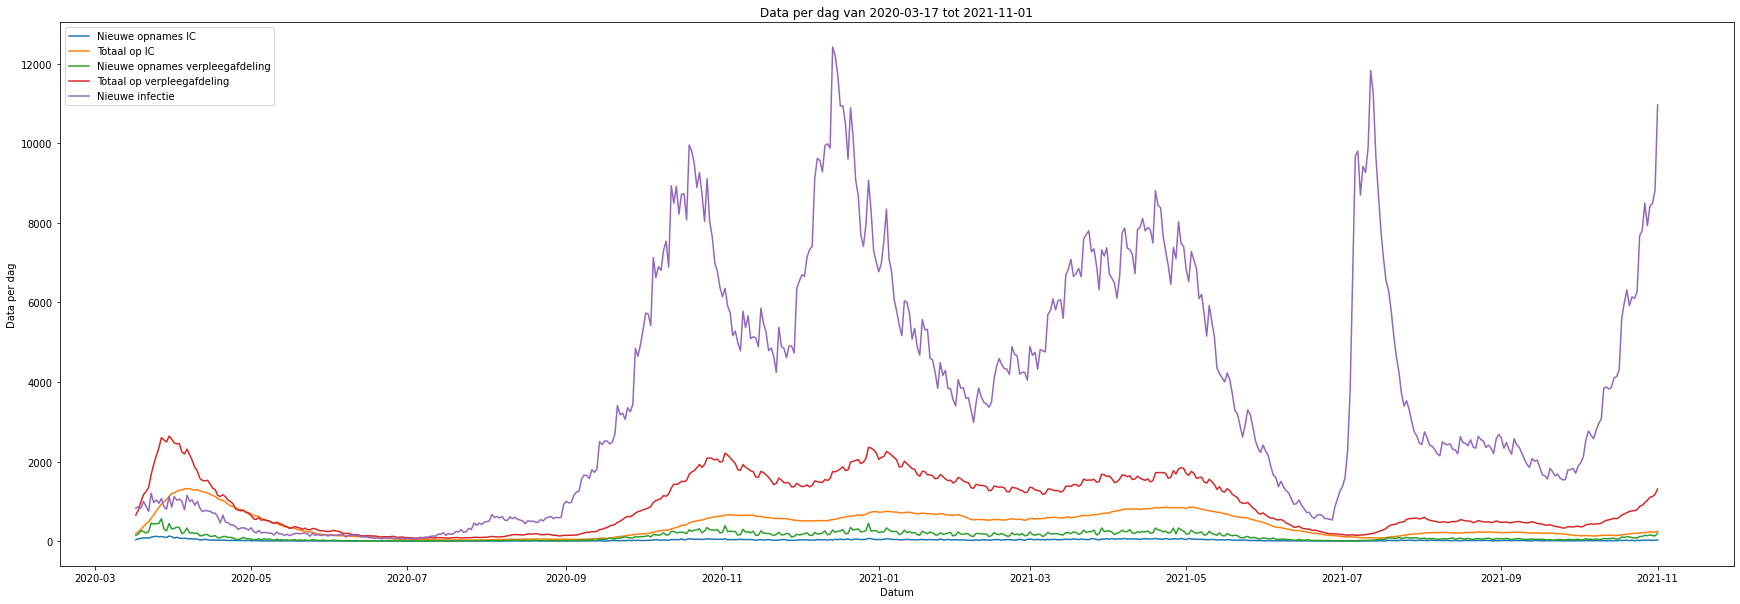

In [15]:
# Plot data per day

plt.figure(figsize=(30,10))
plt.plot(data_per_dag_df['Date_adj'], data_per_dag_df['Opname IC Corona'], label="Nieuwe opnames IC")
plt.plot(data_per_dag_df['Date_adj'], data_per_dag_df['Aanwezig op IC verdacht of bewezen Corona'], label="Totaal op IC")
plt.plot(data_per_dag_df['Date_adj'], data_per_dag_df['Opname verpleegafdeling Corona'], label="Nieuwe opnames verpleegafdeling")
plt.plot(data_per_dag_df['Date_adj'], data_per_dag_df['Aanwezig op verpleegafdeling verdacht of bewezen Corona'], label="Totaal op verpleegafdeling")
plt.plot(data_per_dag_df['Date_adj'], data_per_dag_df['Infection'], label="Nieuwe infectie")
plt.legend()
plt.title(f"Data per dag van {start_date.date()} tot {end_date.date()}")
plt.xlabel("Datum")
plt.ylabel("Data per dag")

Duidelijk is dat het aantal opnames van IC of ziekenhuis vele male minder zijn dan de infectie data. Ook gebeurt iets vreemds in het begin van de grafiek, er zijn meer mensen op de IC/verpleegafdeling dan dat er bij zijn gekomen.

Dit komt mogelijk door die eerste 3 maanden missende data.


Opnames_leeftijd + casus landelijk is ook een combinatie. Omdat hier met de leeftijden gewerkt wordt moeten deze groepen worden samengevoegd.
De leeftijdsgroepen Unkown en <50 zijn outliers dus deze moeten worden verwijderd.

De samenvoeging van leeftijd gaat op de volgende schaal:
- 0-19
- 20-29
- 30-39
- 40-49
- 50-59
- 60-69
- 70-79
- 80-89
- 90+

In [16]:
# Remove rows with unknown age group or <50 age group because those are outliers
drop_selection = besmettingen_merged_df.loc[(besmettingen_merged_df['Agegroup'] == 'Unknown') | (besmettingen_merged_df['Agegroup'] == '<50')].index
besmettingen_corrected_df = besmettingen_merged_df.drop(drop_selection)

# Remove unknown
opnames_leeftijd_corrected_df = opnames_leeftijd_df.drop(opnames_leeftijd_df.loc[opnames_leeftijd_df['Age_group'] == 'Unknown'].index)

# Alter opnames_leeftijd Age_group to match Agegroup in besmettingen_merged
age_maps = [
    [['0-14', '15-19'], '0-19'],
    [['20-24', '25-29'], '20-29'],
    [['30-34', '35-39'], '30-39'],
    [['40-44', '45-49'], '40-49'],
    [['50-54', '55-59'], '50-59'],
    [['60-64', '65-69'], '60-69'],
    [['70-74', '75-79'], '70-79'],
    [['80-84', '85-89'], '80-89'],
]
for age_map in age_maps:
    opnames_leeftijd_corrected_df.replace(age_map[0], age_map[1], inplace=True)

# merge 0-9 and 10-19 group in besmettingen_merged to match age groups
besmettingen_corrected_df.replace(['0-9', '10-19'], '0-19', inplace=True)

# rename Agegroup column to Age_group to match naming
besmettingen_corrected_df.rename(columns={'Agegroup': 'Age_group'}, inplace=True)

# Merge mapped dates
opnames_leeftijd_corrected_df = opnames_leeftijd_corrected_df.groupby(['Date_adj', 'Age_group'], as_index=False).sum()
besmettingen_corrected_df = besmettingen_corrected_df.groupby(['Date_adj', 'Age_group'], as_index=False).sum()

Vervolgens moeten de datum waardes worden aangepast van dagen tot weken. De weken staan in de datum tabel als startdatum van de week en bevat het totaal van de start en de 6 dagen daarna.

In [17]:
# Resample Date_adj by weeks and preserve Age_grouping
besmettingen_week_df = besmettingen_corrected_df.groupby(['Date_adj', 'Age_group']).resample('W-MON', label='left',closed='left', on='Date_adj').sum().reset_index(level=[1,2]).reset_index(drop=True)

# Drop first week of besmettingen dataset because opnames dataset lacks that week
besmettingen_week_df = besmettingen_week_df.loc[besmettingen_week_df['Date_adj'] >= opnames_leeftijd_corrected_df['Date_adj'].min()]

# Dates are changed to weeks, but still need to be merged together into a single week sum
besmettingen_week_df = besmettingen_week_df.groupby(['Date_adj', 'Age_group'], as_index=False).sum()

# Merge the two DataFrames into one
data_per_leeftijd_df = pd.merge(opnames_leeftijd_corrected_df, besmettingen_week_df, on=['Date_adj', 'Age_group'])

Door de gemaakte dataframes op te slaan als csv bestanden kunnen deze later gebruikt worden voor machine learning

In [18]:
# Output created DataFrames to csv files for later use
data_per_leeftijd_df.to_csv(path.join(root_dir, "data_per_leeftijd.csv"), index=False)
data_per_dag_df.to_csv(path.join(root_dir, "data_per_dag.csv"), index=False)
